In [16]:
# Importing Libraries
import pandas as pd
import numpy as np
import torch

import joblib

from pytorch_tabular import TabularModel

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Defining paths
test_data_path = 'C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 1/Dataset_1/test_data.csv'
model_path = 'C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 1/TabTransformer/tabtransformer_model'
scaler_path = 'C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 1/TabTransformer/tabTransformer_scaler.sav'

In [5]:
# Load and prepare test set
test_df = pd.read_csv(test_data_path)

target_col = "__target__"
features = test_df.drop(columns=[target_col]).columns.tolist()

In [6]:
# Display the DataFrame
print(f"Test DataFrame shape: {test_df.shape}")

Test DataFrame shape: (322, 1873)


In [7]:
# Display first 5 rows
test_df.head(5)

abdominal_and_pelvic_pain  abdominal_aortic_aneurysm__without_rupture  \
0                          1                                           1   
1                          1                                           0   
2                          0                                           0   
3                          0                                           0   
4                          0                                           0   

   abdominal_distension__gaseous_  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               0   

   abn_findings_on_dx_imaging_of_abd_regions__inc_retroperiton  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   abnormal_and_inconclusive_findings_on_dx_imaging_of_breast  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  0            

   abnormal_blood_pressure_reading__without_diagnosis  \
0                                                  1    
1                                                  1    
2                                                  0    
3                                                  0    
4                                                  0    

   abnormal_coagulation_profile  abnormal_electrocardiogram__ecg___ekg_  \
0                             1                                       1   
1                             0                                       0   
2                             0                                       0   
3                             0                                       1   
4                             1                                       1   

   abnormal_finding_of_blood_chemistry__unspecified  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   abnormal_findings_on_diagnostic_imaging_and_in_function_studies__without_diagnosis  \
0                                                  1                                    
1                                                  1                                    
2                                                  0                                    
3                                                  1                                    
4                                                  1                                    

   ...  vomiting__unspecified  vomiting_without_nausea  weakness  wheezing  \
0  ...                      0                        0         0         0   
1  ...                      0                        0         1         0   
2  ...                      0                        0         1         0   
3  ...                      0                        0         1         1   
4  ...                      0                        0         1         0   

   white_matter_disease__unspecified  wtrcraft_fall_nos_crew  xerosis_cutis  \
0                                  0                       0              0   
1                                  0                       0              0   
2                                  0                       0              0   
3                                  0                       0              0   
4          

In [8]:
# Load saved scaler and scale validation data
scaler = joblib.load(scaler_path)       # load the previously saved scaler
 
# apply scaling to validation features
test_df_scaled = test_df.copy()
test_df_scaled[features] = scaler.fit_transform(test_df[features])

In [9]:
# Load saved model directory
loaded_model = TabularModel.load_model(model_path)

2025-08-17 16:50:20,168 - {pytorch_tabular.tabular_model:171} - INFO - Experiment Tracking is turned off

2025-08-17 16:50:20,178 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [10]:
# Generate predictions on validation set

# Get predicted probabilities (values between 0 and 1)
test_probs_df = loaded_model.predict(test_df_scaled)
test_probs = test_probs_df.values[:, 1]  # Probability for class 1

# Convert probabilities to binary class labels (threshold = 0.5)
test_preds = (test_probs >= 0.5).astype(int)
y_true = test_df_scaled[target_col]

In [11]:
# Evaluate model performance on validation set

# Accuracy
acc = accuracy_score(y_true, test_preds)
# Precision
prec = precision_score(y_true, test_preds)
# Recall
rec = recall_score(y_true, test_preds)
# F1-score
f1 = f1_score(y_true, test_preds)
# AUC (ROC)
auc = roc_auc_score(y_true, test_probs)

print("Validation Metrics: TabTransformer Model (Dataset 1)")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

# Classification report
print("\nClassification Report TabTransformer Model (Test Set - Dataset 1):")
print(classification_report(y_true, test_preds))

Validation Metrics: TabTransformer Model (Dataset 1)
Accuracy:  0.7609
Precision: 0.7593
Recall:    0.7640
F1-score:  0.7616
AUC:       0.8500

Classification Report TabTransformer Model (Test Set - Dataset 1):
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       161
           1       0.76      0.76      0.76       161

    accuracy                           0.76       322
   macro avg       0.76      0.76      0.76       322
weighted avg       0.76      0.76      0.76       322



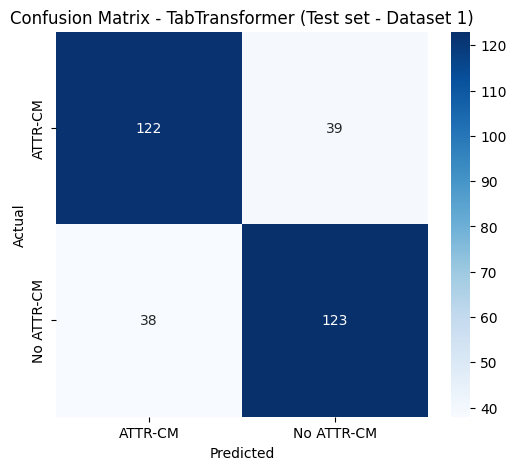

In [12]:
# Confusion Matrix

cm = confusion_matrix(y_true, test_preds)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['ATTR-CM', 'No ATTR-CM'],  # predicted labels
    yticklabels=['ATTR-CM', 'No ATTR-CM']   # actual labels
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TabTransformer (Test set - Dataset 1)')
plt.show()


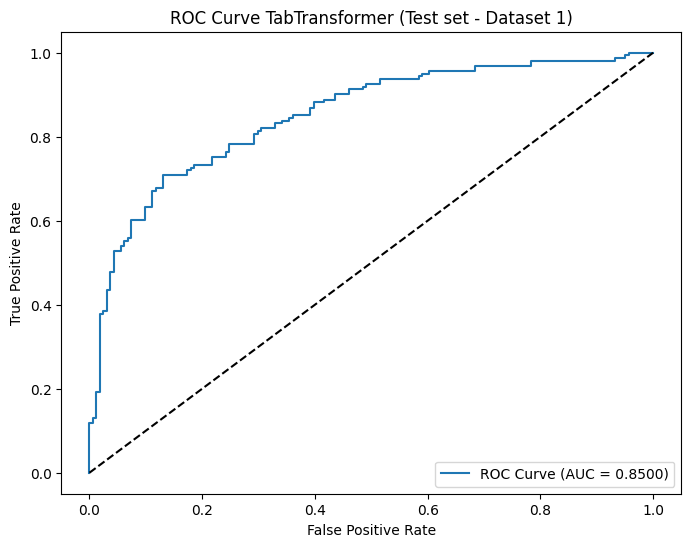

In [13]:
fpr, tpr, _ = roc_curve(y_true, test_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.4f})".format(roc_auc_score(y_true, test_probs)))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve TabTransformer (Test set - Dataset 1)")
plt.legend(loc="lower right")
plt.show()


In [14]:
# Predictions on Test Dataset 

# Run the trained TabTransformer on the test dataset
preds = loaded_model.predict(test_df)  
# Get probabilities of the positive class (ATTR-CM)
probs_class_1 = preds.values[:, 1]  
# Convert probabilities into binary predictions using a threshold
pred_classes = (probs_class_1 >= 0.5).astype(int)  

C:\Users\Sreelakshmi\miniconda3\envs\tabular_final_env\lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.00944173 1.00944173 0.00932974 0.00932974 0.00932974 0.00932974
 1.00944173 1.00944173 1.00944173 1.00944173 0.00932974 0.00932974
 0.00932974 0.00932974 1.00944173 0.00932974 1.00944173 0.00932974
 0.00932974 1.00944173 1.00944173 0.00932974 1.00944173 0.00932974
 0.00932974 0.00932974 0.00932974 0.00932974 0.00932974 1.00944173
 1.00944173 1.00944173 0.00932974 1.00944173 1.00944173 1.00944173
 1.00944173 1.00944173 0.00932974 0.00932974 1.00944173 1.00944173
 1.00944173 0.00932974 0.00932974 0.00932974 0.00932974 1.00944173
 1.00944173 1.00944173 1.00944173 0.00932974 0.00932974 1.00944173
 0.00932974 1.00944173 1.00944173 1.00944173 1.00944173 1.00944173
 0.00932974 1.00944173 1.00944173 1.00944173 1.00944173 0.00932974
 1.00944173 1.00944173 0.0093

In [15]:
# Make a copy of the original test dataframe
output_df = test_df.copy()

# Add predicted binary class (0/1) to the dataframe
output_df["predicted_class"] = pred_classes

# Add predicted probability for class 1 (positive class)
output_df["predicted_probability"] = probs_class_1

# Defining output path for saving predictions
output_path = r"C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 1/TabTransformer/testing_data_predictions.csv"

# Save the dataframe to CSV (without index column)
output_df.to_csv(output_path, index=False)

print(f"Predictions saved to: {output_path}")


Predictions saved to: C:/Users/Sreelakshmi/00_Final_Project_MENG/Approach 1/TabTransformer/testing_data_predictions.csv
